<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/GroupAssignment1_test_DEV_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import nltk
import os
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')

nltk.download('gutenberg')
#thsi section is used to extract the list of books made available through gutenberg samples 
folder_path = "/root/nltk_data/corpora/gutenberg"

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        print(filename)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


bryant-stories.txt
chesterton-ball.txt
shakespeare-caesar.txt
austen-sense.txt
melville-moby_dick.txt
edgeworth-parents.txt
shakespeare-hamlet.txt
whitman-leaves.txt
carroll-alice.txt
chesterton-brown.txt
chesterton-thursday.txt
burgess-busterbrown.txt
bible-kjv.txt
shakespeare-macbeth.txt
README
austen-persuasion.txt
blake-poems.txt
austen-emma.txt
milton-paradise.txt


In [7]:


# Function to create partitions of 100 words each
def textdata_partitions(text, label):
    partitions = []
    words = nltk.word_tokenize(text)

    for c in range(0, len(words)):
        partitions.append((words[c:c+100], label)) 
        c=c+100
    return partitions

# Opening a sample of gutenberg book 
#the line below was a trial for generalising the program for taking in book name and the custom label 
#book = input("enter the book name you want to partition")

book = gutenberg.raw('shakespeare-caesar.txt')

bookdeets = input("enter the label you want in classification")

################################################################################
#text data kept commented for code reference and customising for generalisation  
#bookdeets = 'shakespeare-caesar-William Shakespeare-1599'
#authorname = 'William Shakespeare'
#publicationyear = '1599'
################################################################################



# partintioning the words in book in to 100 words partitions 
partitions = textdata_partitions(book, bookdeets)

# This line is creating 200 samples of 100 words at random by using the 'random' lib
samples = random.sample(partitions, 200)


# Regex is used to clean the data 
for r in range(len(samples)):
    samples[r] = (re.sub(r'[^\w\s]','', ' '.join(samples[r][0])), samples[r][1])

# Serialize the data using Pandas
df = pd.DataFrame(samples, columns=['Random_book_sample', 'Custom_label'])

df.to_csv('books_in_partition.csv', index=False)


print("partition for the book is exported in books_in_partition.csv.")

enter the label you want in classificationWilliam_Shakespeare
partition for the book is exported in books_in_partition.csv.


In [ ]:
#this section will open the generated .csv file JUST ENTER THE FILE NAME i.e "books_in_partition.csv"
bk_name = input("enter the book partition name to be read with .csv")
pd.read_csv(bk_name)

# *MODEL AND EFFICIENCY PREDICTION **

In [72]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt


### **BAG OF WORDS ACCURACY TEST **

In [ ]:
pd.read_csv("partition_booktest1.csv")

In [79]:
from nltk.metrics.scores import precision
# Load the dataset
df = pd.read_csv("partition_booktest1.csv")
# Convert text to a bag of words representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(df['Random_book_sample'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['Custom_label'], test_size=0.2)

# Train and evaluate the efficiency of each model
models = [
    MultinomialNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    #GradientBoostingRegressor(),
]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred,average=None)
    print(f"Precision of {model.__class__.__name__}: {precision}")

    recall = recall_score(y_test, y_pred,average=None)
    print(f"Recall score of {model.__class__.__name__}: {recall}")

    Fscore = f1_score(y_test, y_pred,average=None)
    print(f"F_score of {model.__class__.__name__}: {Fscore}")
    print("--------------------------------------------------------------")
    #print(f"Precision of {model.__class__.__name__}: {precision:.2f}")

Accuracy of MultinomialNB: 1.00
Precision of MultinomialNB: [1. 1.]
Recall score of MultinomialNB: [1. 1.]
F_score of MultinomialNB: [1. 1.]
--------------------------------------------------------------
Accuracy of SVC: 1.00
Precision of SVC: [1. 1.]
Recall score of SVC: [1. 1.]
F_score of SVC: [1. 1.]
--------------------------------------------------------------
Accuracy of DecisionTreeClassifier: 0.95
Precision of DecisionTreeClassifier: [0.97727273 0.91666667]
Recall score of DecisionTreeClassifier: [0.93478261 0.97058824]
F_score of DecisionTreeClassifier: [0.95555556 0.94285714]
--------------------------------------------------------------
Accuracy of RandomForestClassifier: 1.00
Precision of RandomForestClassifier: [1. 1.]
Recall score of RandomForestClassifier: [1. 1.]
F_score of RandomForestClassifier: [1. 1.]
--------------------------------------------------------------
Accuracy of GradientBoostingClassifier: 0.97
Precision of GradientBoostingClassifier: [0.97826087 0.9705

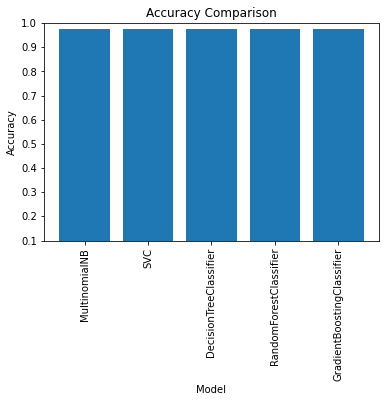

In [85]:
model_names = ['MultinomialNB', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

# Plot the accuracy of each model
plt.bar(model_names, accuracy)

# Add labels and title
plt.title("Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.1, 1)
#plt.xlim(0.1,5)
plt.xticks(rotation=90)


# Show the plot
plt.show()

TEST SECTION
 

In [26]:
# Example: Let's say you have a dataframe 'df' with two columns: 'text' and 'author'
df = pd.read_csv("books_in_partition.csv")

# Create a bag of words representation of the text
vectorizer = CountVectorizer()
text_vectors = vectorizer.fit_transform(df['Random_book_sample'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_vectors, df['Custom_label'], test_size=0.2)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict the author of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 1.0
